In [1]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


In [2]:

df=pd.read_csv("standardisedBank.csv").drop(['Unnamed: 0'],axis=1)
#Standardisation of Data
scaler=StandardScaler()
scaler.fit(df.drop('deposit',axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.606965,0.13549,0.256419,-0.893915,0.436803,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
1,0.288529,0.13549,-0.437895,-0.893915,0.436803,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
2,-0.747384,0.13549,-0.446762,-0.893915,-2.289359,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
3,0.571051,0.13549,0.047205,-0.893915,0.436803,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
4,-0.747384,0.13549,-0.447091,1.118674,0.436803,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519


In [3]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.30, random_state=3)

[0.8734794878400967, 0.8873828397273436, 0.8935129507911876, 0.8944610577527994, 0.8950299578792219, 0.8948087189411688, 0.8941133965644305, 0.8943978166697624, 0.8940501754533126, 0.8941449521972107, 0.8947768837015155, 0.8949665570208287, 0.8944925135259825, 0.8946189058184192, 0.8935446062835654, 0.8933549928800109, 0.8935130206929058, 0.8937341397994419, 0.8937025342368627, 0.8933549928800106]
[[11705   264]
 [ 1135   460]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11969
           1       0.64      0.29      0.40      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.63      0.67     13564
weighted avg       0.88      0.90      0.88     13564

AUC score for KNN is 0.8373866553382026
Test Accuracy score for KNN is 0.8968593335299322
Train Accuracy score for KNN is 0.9086485290864853
[0.3841353548670622, 0.3289086647623233, 0.312128469933348, 0.2918332967113455, 0.2769427964549916, 

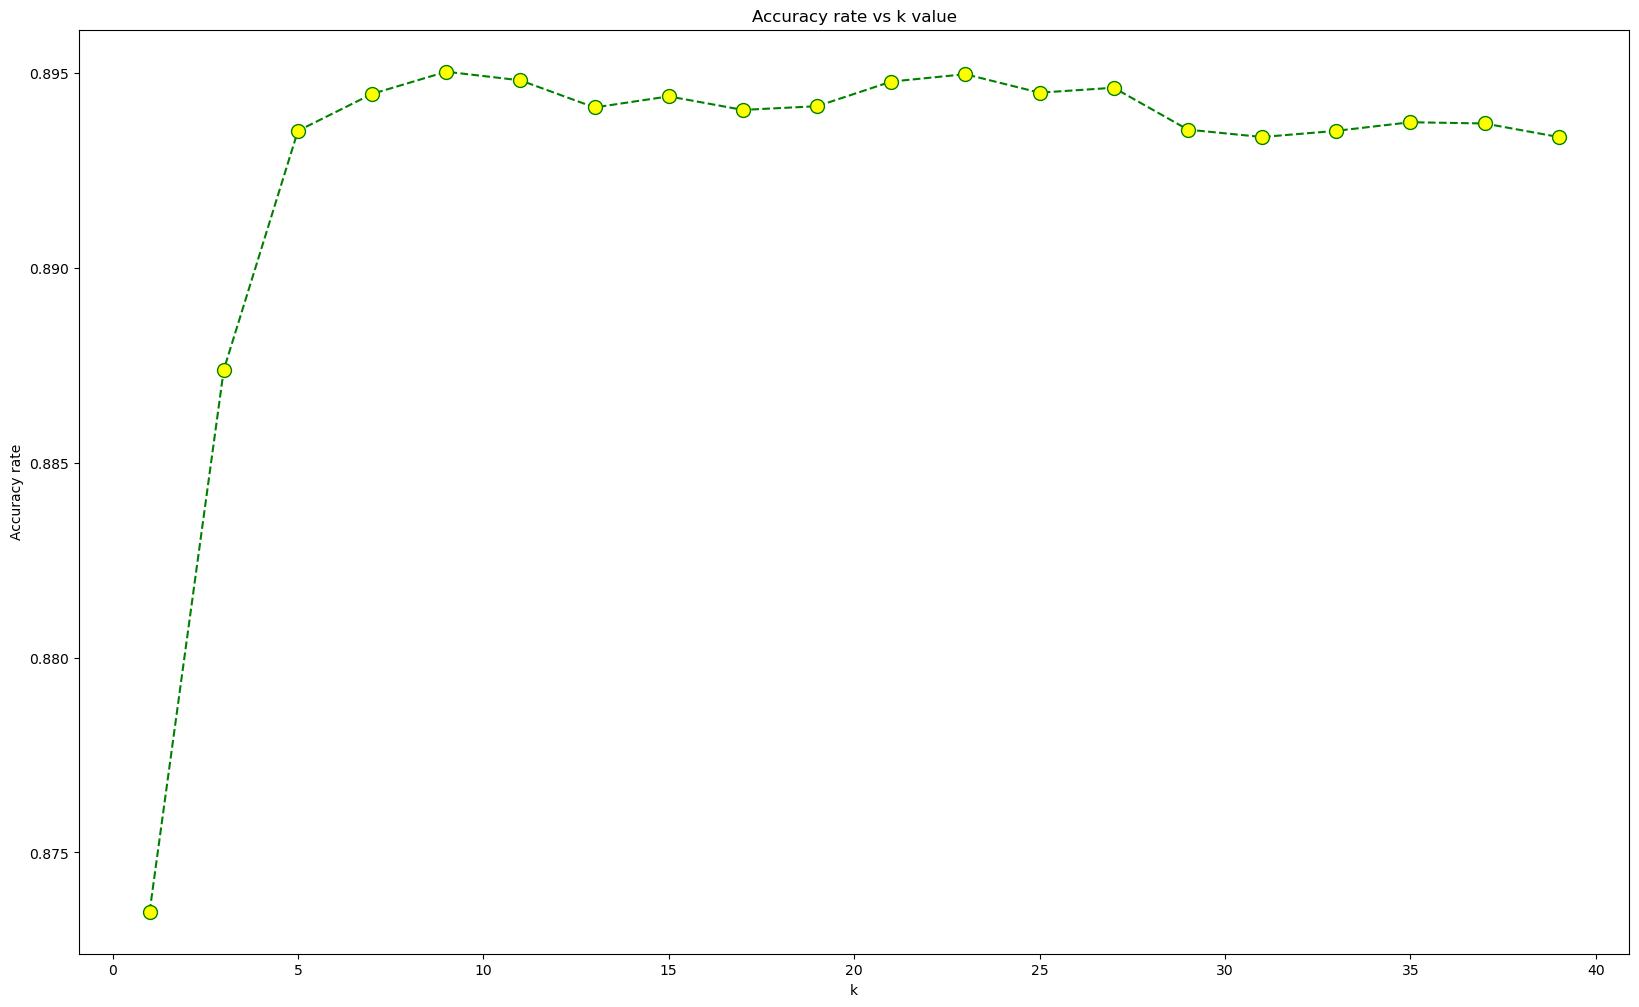

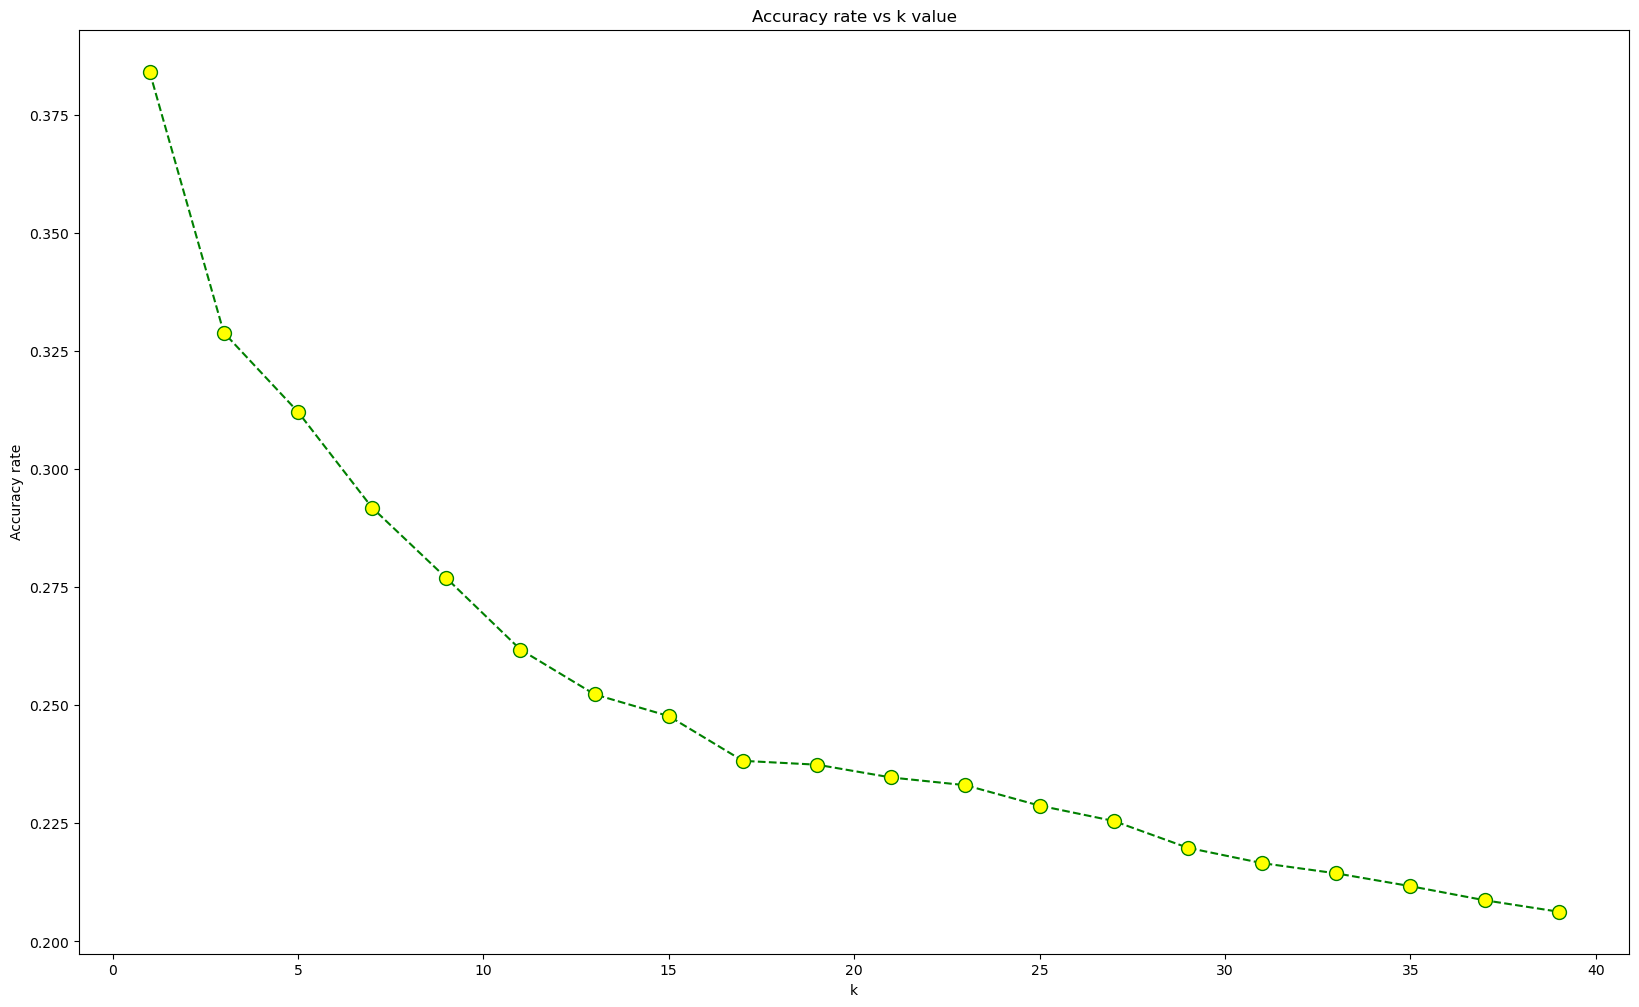

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score

def optimize_knn(df, X_train, X_test, y_train, y_test):
    # Trying different odd values of k for KNN and finding accuracy for them
    accuracy_rate = []
    for i in range(1, 40, 2):
        knn = KNeighborsClassifier(n_neighbors=i)
        score = cross_val_score(knn, X_train, y_train, cv=10)
        accuracy_rate.append(score.mean())
    print(accuracy_rate)

    # Plotting accuracy of KNN for every value of K. Accuracy is highest when K=9
    plt.figure(figsize=(20, 12))
    plt.plot(range(1, 40, 2), accuracy_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
    plt.title('Accuracy rate vs k value')
    plt.xlabel('k')
    plt.ylabel('Accuracy rate')

    # Training KNN with the best value of K
    best_k = 9
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)
    aucScoreKNN = roc_auc_score(y_test, y_pred_prob[:, 1])
    fprKNN, tprKNN, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print("AUC score for KNN is", aucScoreKNN)
    print("Test Accuracy score for KNN is", accuracy_score(y_test, pred))
    predT = knn.predict(X_train)
    print("Train Accuracy score for KNN is", accuracy_score(y_train, predT))

    # Training KNN for different odd values of K to find maximum Recall
    recall_rate = []
    for i in range(1, 40, 2):
        knn = KNeighborsClassifier(n_neighbors=i)
        score = cross_val_score(knn, X_train, y_train, cv=10, scoring='recall')
        recall_rate.append(score.mean())
    print(recall_rate)

    # Plotting recall of values of K
    plt.figure(figsize=(20, 12))
    plt.plot(range(1, 40, 2), recall_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
    plt.title('Accuracy rate vs k value')
    plt.xlabel('k')
    plt.ylabel('Accuracy rate')

    return accuracy_rate, aucScoreKNN, confusion_matrix(y_test, pred), classification_report(y_test, pred), accuracy_score(y_test, pred), accuracy_score(y_train, predT), recall_rate, fprKNN, tprKNN

# Read the data and drop unnecessary column
df = pd.read_csv("standardisedBank.csv").drop(['Unnamed: 0'], axis=1)

# Standardization of Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('deposit', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['deposit'], test_size=0.30, random_state=3)

# Call the function and pass the variables
result = optimize_knn(df, X_train, X_test, y_train, y_test)
accuracy_rate, aucScoreKNN, confusion_matrix, classification_report, test_accuracy_score, train_accuracy_score, recall_rate, fprKNN, tprKNN = result


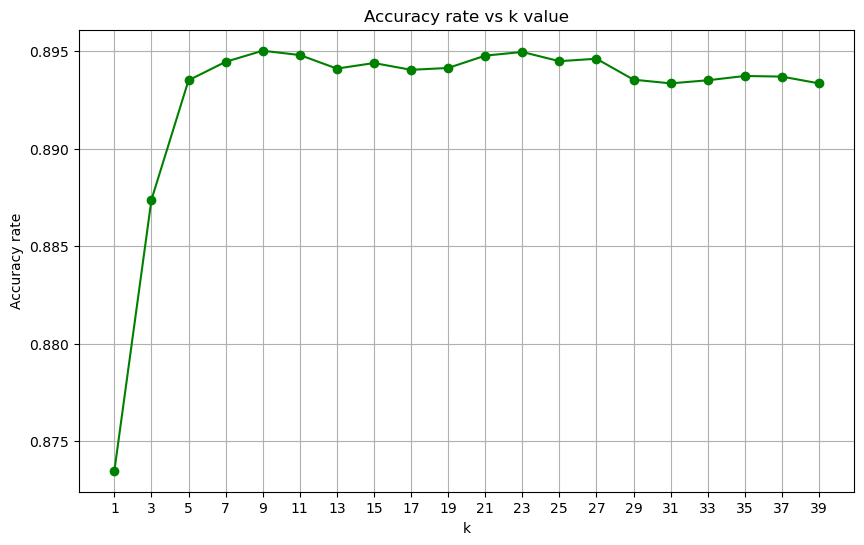

Best K value: 9
AUC score for KNN: 0.8373866553382026
Confusion Matrix:
 [[11705   264]
 [ 1135   460]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11969
           1       0.64      0.29      0.40      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.63      0.67     13564
weighted avg       0.88      0.90      0.88     13564

Test Accuracy: 0.8968593335299322
Train Accuracy: 0.9086485290864853
Test Recall: 0.2884012539184953
Train Recall: 0.344612885760693


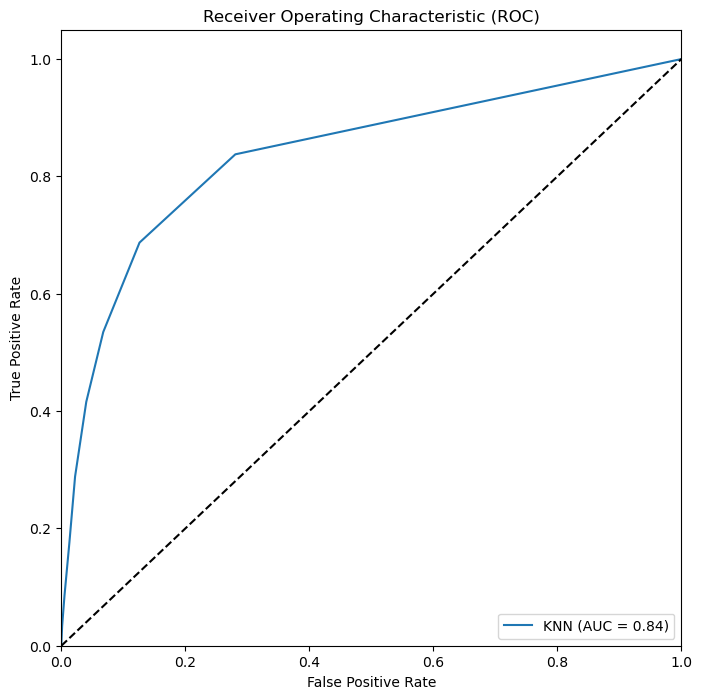

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score

def optimize_knn(df, X_train, X_test, y_train, y_test):
    # Trying different odd values of k for KNN and finding accuracy for them
    k_values = range(1, 40, 2)
    accuracy_rate = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, X_train, y_train, cv=10)
        accuracy_rate.append(score.mean())

    # Plotting accuracy of KNN for every value of K. Accuracy is highest when K=9
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_rate, color='green', marker='o')
    plt.title('Accuracy rate vs k value')
    plt.xlabel('k')
    plt.ylabel('Accuracy rate')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    # Training KNN with the best value of K
    best_k = k_values[np.argmax(accuracy_rate)]
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)
    auc_score_knn = roc_auc_score(y_test, y_pred_prob[:, 1])
    fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
    cm = confusion_matrix(y_test, pred)
    cr = classification_report(y_test, pred)
    test_accuracy = accuracy_score(y_test, pred)
    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_recall = recall_score(y_test, pred)
    train_recall = recall_score(y_train, knn.predict(X_train))

    return best_k, auc_score_knn, cm, cr, test_accuracy, train_accuracy, test_recall, train_recall, fpr_knn, tpr_knn

# Read the data and drop unnecessary column
df = pd.read_csv("standardisedBank.csv").drop(['Unnamed: 0'], axis=1)

# Standardization of Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('deposit', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['deposit'], test_size=0.30, random_state=3)

# Call the function and pass the variables
result = optimize_knn(df_feat, X_train, X_test, y_train, y_test)
best_k, auc_score, confusion_matrix, classification_report, test_accuracy, train_accuracy, test_recall, train_recall, fpr, tpr = result

# Print the results
print("Best K value:", best_k)
print("AUC score for KNN:", auc_score)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)
print("Test Recall:", test_recall)
print("Train Recall:", train_recall)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
 [[10948  1021]
 [  787   808]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     11969
           1       0.44      0.51      0.47      1595

    accuracy                           0.87     13564
   macro avg       0.69      0.71      0.70     13564
weighted avg       0.88      0.87      0.87     13564

AUC score for NB: 0.8258527842694988
Test Accuracy score for NB: 0.86670598643468
Recall score for NB: 0.5065830721003135


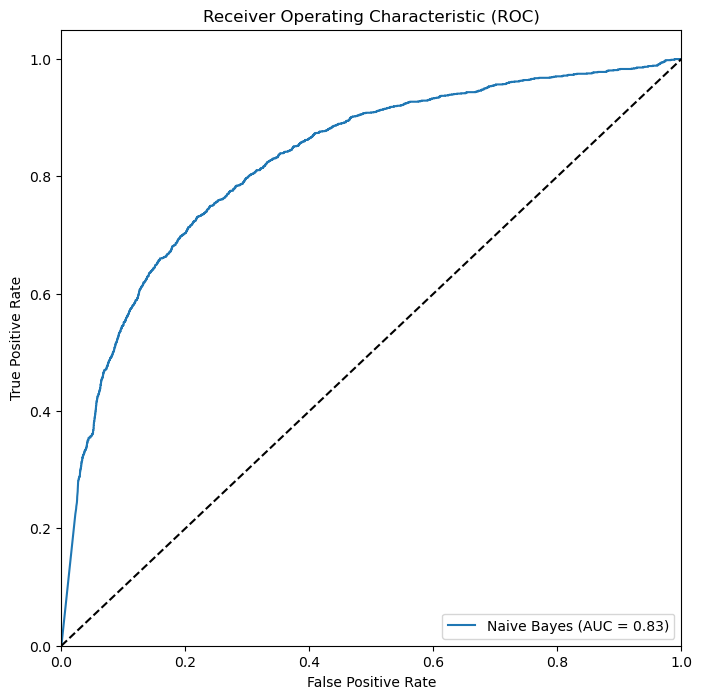

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score

def train_evaluate_naive_bayes(X_train, X_test, y_train, y_test):
    # Training Naive Bayes with additional parameters
    gnb = GaussianNB(var_smoothing=1e-09)
    gnb.fit(X_train, y_train)
    pred = gnb.predict(X_test)
    acc_nb = accuracy_score(y_test, pred)
    y_pred_prob = gnb.predict_proba(X_test)
    auc_score_nb = roc_auc_score(y_test, y_pred_prob[:, 1])
    fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
    cm = confusion_matrix(y_test, pred)
    cr = classification_report(y_test, pred)
    recall_nb = recall_score(y_test, pred)

    return acc_nb, auc_score_nb, cm, cr, recall_nb, fpr_nb, tpr_nb

# Read the data and drop unnecessary column
df = pd.read_csv("standardisedBank.csv").drop(['Unnamed: 0'], axis=1)

# Standardization of Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('deposit', axis=1))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['deposit'], test_size=0.30, random_state=3)

# Call the function and pass the variables
acc_nb, auc_score_nb, confusion_matrix_nb, classification_report_nb, recall_nb, fpr_nb, tpr_nb = train_evaluate_naive_bayes(
    X_train, X_test, y_train, y_test)

# Print the results
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Classification Report:\n", classification_report_nb)
print("AUC score for NB:", auc_score_nb)
print("Test Accuracy score for NB:", acc_nb)
print("Recall score for NB:", recall_nb)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % auc_score_nb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Regression Model

In [4]:

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 3, 7),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100]
    }
]
logModel = LogisticRegression()

#GridserchCV tries all possible combinations of hyperparameters to find best accuracy

clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy', cv = 3 , n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
# Training Logistic Regression
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

pred = best_clf.predict(X_test)
accLR = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreLR = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLR, tprLR, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR is ",aucScoreLR)
print("Test Accuracy score for LR is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for LR is ",accuracy_score(y_train, predT))
print("Best parameters for accuracy of LR are ",best_clf.best_params_)

[[11706   263]
 [ 1031   564]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11969
           1       0.68      0.35      0.47      1595

    accuracy                           0.90     13564
   macro avg       0.80      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564

AUC score for LR is  0.9106768766020684
Test Accuracy score for LR is  0.9046004128575641
Train Accuracy score for LR is  0.9003697032894113
Best parameters for accuracy of LR are  {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [5]:
# Training Logistic Regression for recall

clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall', cv = 3, n_jobs=-1 )
best_clfR = clfR.fit(X_train,y_train)

In [6]:
# print recall and best parameters

predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallLR=recall_score(y_test, predR)
print("Test Recall score for LR is ",recallLR)
print("Train recall score for LR is ",recall_score(y_train, predRT))
print("Best parameters for recall of LR are ",best_clfR.best_params_)


Test Recall score for LR is  0.3542319749216301
Train recall score for LR is  0.33405522468868437
Best parameters for recall of LR are  {'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}


In [7]:
# Logistic Regression with Polynomial Features (degree=2)

In [10]:
# Logistic regression with polynomial features works better with normalozation instead of standardization
# so read file again

df=pd.read_csv("standardisedBank.csv").drop(['Unnamed: 0'],axis=1)
dfX=df.drop('deposit',axis=1)
df.head()
# Minmaxscaler is used to normalise data

scaler = MinMaxScaler()
bankMM = scaler.fit_transform(dfX)
bankMM = pd.DataFrame(bankMM, columns=dfX.columns)
bankMM.head()
# train test split (70:30)
X_train,X_test,y_train,y_test=train_test_split(bankMM,df['deposit'],test_size=0.30, random_state=3)

In [11]:
# creating polynomial features with degree 2
poly2 = PolynomialFeatures(degree=2)
X_trainP=poly2.fit_transform(X_train)
# Hyperparameters 

param_grid = {'penalty' : ['l1', 'l2'], 'C' : [0.001,0.01,0.1,1,5,25]    }
#GridserchCV tries all possible combinations of hyperparameters to find best accuracy

logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy',verbose=True, cv = 5,n_jobs=-1 )
best_clf = clf.fit(X_trainP,y_train)
# create polynomial features with degree 2 for test data
X_testP=poly2.fit_transform(X_test)
# Training Logistic Regression with polynomial features with degree 2
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_testP)
accLRP2 = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_testP)
aucScoreLRP2 = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLRP2, tprLRP2, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR Poly2 is ",aucScoreLRP2)
print("Test Accuracy score for LR Poly2 is ",accLRP2)
predT=best_clf.predict(X_trainP)
print("Train Accuracy score for LR Poly2 is ",accuracy_score(y_train, predT))
print("Best parameters for LR are ",best_clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[[11634   335]
 [  945   650]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.66      0.41      0.50      1595

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.73     13564
weighted avg       0.89      0.91      0.90     13564

AUC score for LR Poly2 is  0.923378707428883
Test Accuracy score for LR Poly2 is  0.9056325567679151
Train Accuracy score for LR Poly2 is  0.9111448162543053
Best parameters for LR are  {'C': 1, 'penalty': 'l2'}


In [12]:
logModel = LogisticRegression()
clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall',verbose=True, cv = 5,n_jobs=-1 )
best_clfR = clfR.fit(X_trainP,y_train)
# Training Logistic Regression for recall

predR = best_clfR.predict(X_testP)
predRT=best_clfR.predict(X_trainP)
recallLRP2=recall_score(y_test, predR)
print("Test Recall score for LR with polynomial features degree 2  is ",recallLRP2)
print("Train recall score for LR with polynomial features degree 2 is ",recall_score(y_train, predRT))
print("Best parameters for recall of LR with polynomial features degree 2 are ",best_clfR.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test Recall score for LR with polynomial features degree 2  is  0.42382445141065833
Train recall score for LR with polynomial features degree 2 is  0.4466702761234434
Best parameters for recall of LR with polynomial features degree 2 are  {'C': 5, 'penalty': 'l2'}


# SVM

In [13]:

classifier = SVC(probability=True)
parameters=[{'C':[1],'kernel':['linear']},
            {'C':[1],'kernel':['rbf'], 'gamma':[0.1]},
            {'C':[1],'kernel': ['poly'], 'degree':[2]}      ]
clf = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=3, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
# Training SVM
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accSVM = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreSVM = roc_auc_score(y_test,  y_pred_prob[:,1])
fprSVM, tprSVM, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for SVM is ",aucScoreSVM)
print("Test Accuracy score for SVM is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for SVM is ",accuracy_score(y_train, predT))
print("Best parameters for SVM are ",best_clf.best_params_)


[[11804   165]
 [ 1256   339]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.67      0.21      0.32      1595

    accuracy                           0.90     13564
   macro avg       0.79      0.60      0.63     13564
weighted avg       0.88      0.90      0.87     13564

AUC score for SVM is  0.9185248412107454
Test Accuracy score for SVM is  0.8952373930993807
Train Accuracy score for SVM is  0.8944607703731792
Best parameters for SVM are  {'C': 1, 'degree': 2, 'kernel': 'poly'}


In [14]:
# Training SVM for recall

clfR = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='recall',cv=3, n_jobs=-1)
best_clfR = clfR.fit(X_train,y_train)
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallSVM=recall_score(y_test, predR)
print("Test Recall score for SVM is ",recallSVM)
print("Train recall score for SVM is ",recall_score(y_train, predRT))
print("Best parameters for recall of SVM are ",best_clfR.best_params_)


Test Recall score for SVM is  0.21253918495297805
Train recall score for SVM is  0.20790471034109367
Best parameters for recall of SVM are  {'C': 1, 'degree': 2, 'kernel': 'poly'}


# Decession Tree

In [16]:

dfX=df.drop('deposit',axis=1)
dfX.head()
X_train,X_test,y_train,y_test=train_test_split(dfX,df['deposit'],test_size=0.30, random_state=3)
dt=DecisionTreeClassifier()
parameters={'max_depth':[1,2,3,4,5,6,7],
            'min_samples_leaf':[1,2,3],
            'min_samples_split':[2,3],
            'criterion':['gini','entropy']}
clf = GridSearchCV(dt,parameters,scoring='accuracy',verbose=True)
best_clf = clf.fit(X_train,y_train)
# Training Decision Tree
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accDT = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreDT = roc_auc_score(y_test,  y_pred_prob[:,1])
fprDT, tprDT, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Decision Tree is ",aucScoreDT)
print("Test Accuracy score for DT is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for DT is ",accuracy_score(y_train, predT))
print("Best parameters for DT are ",best_clf.best_params_)


Fitting 5 folds for each of 84 candidates, totalling 420 fits
[[11628   341]
 [  982   613]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.64      0.38      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564

AUC score for Decision Tree is  0.8552883873727086
Test Accuracy score for DT is  0.9024624004718372
Train Accuracy score for DT is  0.9122507662653648
Best parameters for DT are  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [17]:
#Gridsearchcv Training Decision Tree for recall

clfR = GridSearchCV(dt,parameters,scoring='recall',verbose=True)
best_clfR = clfR.fit(X_train,y_train)
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallDT=recall_score(y_test, predR)
print("Test Recall score for DT is ",recallDT)
print("Train recall score for DT is ",recall_score(y_train, predRT))
print("Best parameters for recall of DT are ",best_clfR.best_params_)


Fitting 5 folds for each of 84 candidates, totalling 420 fits
Test Recall score for DT is  0.34733542319749217
Train recall score for DT is  0.3308067135896048
Best parameters for recall of DT are  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Random FOrest

In [18]:

rf = RandomForestClassifier()

parameters={'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2],
 'n_estimators': [500]}
clf=GridSearchCV(estimator = rf, param_grid = parameters,scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[[11652   317]
 [  953   642]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.67      0.40      0.50      1595

    accuracy                           0.91     13564
   macro avg       0.80      0.69      0.73     13564
weighted avg       0.89      0.91      0.90     13564

AUC score for Random Forest is  0.9336813413753556
Test Accuracy score for Random Forest is  0.9063698024181658
Train Accuracy score for Random Forest is  0.994723038518659
Best parameters for Random Forest are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [19]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Test Recall score for RF is  0.43134796238244516
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


# XGBOOST

In [20]:

params = {
            'eta': np.arange(0.1),
            'min_child_weight': np.arange(1, 5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0).tolist()
        }
xgb_model = XGBClassifier(objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
clf = GridSearchCV(xgb_model, param_grid = params, scoring = 'accuracy',cv = skf.split(X_train, y_train),verbose=True)
best_clf = clf.fit(X_train,y_train)
# Training XGBOOST
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accXGBOOST = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreXGBOOST = roc_auc_score(y_test,  y_pred_prob[:,1])
fprXGBOOST, tprXGBOOST, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for XGBOOST is ",aucScoreXGBOOST)
print("Test Accuracy score for XGBOOST is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for XGBOOST is ",accuracy_score(y_train, predT))
print("Best parameters for XGBOOST are ",best_clf.best_params_)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[[11969     0]
 [ 1595     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

AUC score for XGBOOST is  0.5
Test Accuracy score for XGBOOST is  0.8824093187850192
Train Accuracy score for XGBOOST is  0.8832748759756059
Best parameters for XGBOOST are  {'colsample_bytree': 0.5, 'eta': 0.0, 'gamma': 5, 'min_child_weight': 1, 'subsample': 0.5}


In [21]:
#Gridsearchcv And Training XGBBOST for recall
clfR = GridSearchCV(xgb_model, param_grid = params, scoring = 'recall',cv = skf.split(X_train, y_train),verbose=True)
best_clfR = clfR.fit(X_train,y_train)
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallXGBOOST=recall_score(y_test, predR)
print("Test Recall score for XGBOOST is ",recallXGBOOST)
print("Train recall score for XGBOOST is ",recall_score(y_train, predRT))
print("Best parameters for recall of XGBOOST are ",best_clfR.best_params_)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Test Recall score for XGBOOST is  0.0
Train recall score for XGBOOST is  0.0
Best parameters for recall of XGBOOST are  {'colsample_bytree': 0.5, 'eta': 0.0, 'gamma': 5, 'min_child_weight': 1, 'subsample': 0.5}


<AxesSubplot:>

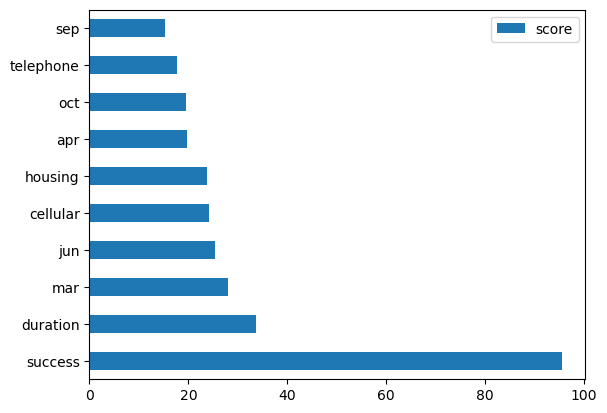

In [22]:
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
best_clf = XGBClassifier(colsample_bytree= 0.94, eta= 0.25000000000000006, gamma= 5, min_child_weight= 1.5, subsample= 0.94,objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
best_clf.fit(X_train,y_train)
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
    
feature_important = best_clf.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh')

# ROC CURVE

In [31]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# add FPR, TPR and AUC for every algorithm
result_table=result_table.append({'classifiers':"KNN Classifier",'fpr':fprKNN,'tpr':tprKNN,'auc':aucScoreKNN}, ignore_index=True)
result_table=result_table.append({'classifiers':"Naive Bayes",'fpr':fpr_nb,'tpr':tpr_nb,'auc':auc_score_nb}, ignore_index=True)
result_table=result_table.append({'classifiers':"Logistic Regression",'fpr':fprLR,'tpr':tprLR,'auc':aucScoreLR}, ignore_index=True)

#result_table=result_table.append({'classifiers':"LR with Poly degree 2",'fpr':fprLRP2,'tpr':tprLRP2,'auc':aucScoreLRP2}, ignore_index=True)
#result_table=result_table.append({'classifiers':"LR with Poly degree 3",'fpr':fprLRP3,'tpr':tprLRP3,'auc':aucScoreLRP3}, ignore_index=True)


result_table=result_table.append({'classifiers':"SVM Classifier",'fpr':fprSVM,'tpr':tprSVM,'auc':aucScoreSVM}, ignore_index=True)
result_table=result_table.append({'classifiers':"Deciosion Tree",'fpr':fprDT,'tpr':tprDT,'auc':aucScoreDT}, ignore_index=True)
result_table=result_table.append({'classifiers':"Random Forest",'fpr':fprRF,'tpr':tprRF,'auc':aucScoreRF}, ignore_index=True)
#result_table=result_table.append({'classifiers':"GBDT Classifier",'fpr':fprGBDT,'tpr':tprGBDT,'auc':aucScoreGBDT}, ignore_index=True)
result_table=result_table.append({'classifiers':"XGBoost Classifier",'fpr':fprXGBOOST,'tpr':tprXGBOOST,'auc':aucScoreXGBOOST}, ignore_index=True)

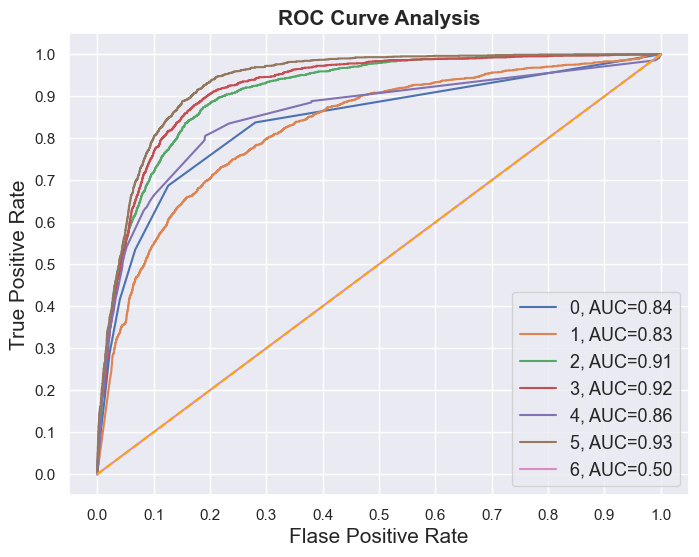

In [32]:

# Plotting all ROC in one plot

sns.set()

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()